In [1]:
# loading required libraries and packagers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from ydata_profiling import ProfileReport
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/data.csv')

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [6]:
df.rename(columns = {'Air temperature [K]':'Air temperature',
                     'Process temperature [K]':'Process temperature',
                     'Rotational speed [rpm]':'Rotational speed',
                     'Torque [Nm]':'Torque',
                     'Tool wear [min]':'Tool wear'},
          inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Product ID           10000 non-null  object 
 2   Type                 10000 non-null  object 
 3   Air temperature      10000 non-null  float64
 4   Process temperature  10000 non-null  float64
 5   Rotational speed     10000 non-null  int64  
 6   Torque               10000 non-null  float64
 7   Tool wear            10000 non-null  int64  
 8   Machine failure      10000 non-null  int64  
 9   TWF                  10000 non-null  int64  
 10  HDF                  10000 non-null  int64  
 11  PWF                  10000 non-null  int64  
 12  OSF                  10000 non-null  int64  
 13  RNF                  10000 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 1.1+ MB


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UDI,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
Product ID,10000,10000,M14860,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10000,3,L,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature,10000.0,NaN,NaN,NaN,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature,10000.0,NaN,NaN,NaN,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed,10000.0,NaN,NaN,NaN,1538.7761,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque,10000.0,NaN,NaN,NaN,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear,10000.0,NaN,NaN,NaN,107.951,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,NaN,NaN,NaN,0.0339,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,NaN,NaN,NaN,0.0046,0.067671,0.0,0.0,0.0,0.0,1.0


In [9]:
#drop Product ID and UDI

df.drop(['Product ID','UDI','TWF','HDF','PWF','OSF','RNF'],axis = 1, inplace = True)

In [10]:
df.head(5)

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [11]:
#convert all columns to float 

for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except:
        pass

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   Air temperature      10000 non-null  float64
 2   Process temperature  10000 non-null  float64
 3   Rotational speed     10000 non-null  float64
 4   Torque               10000 non-null  float64
 5   Tool wear            10000 non-null  float64
 6   Machine failure      10000 non-null  float64
dtypes: float64(6), object(1)
memory usage: 547.0+ KB


In [13]:
df.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure
0,M,298.1,308.6,1551.0,42.8,0.0,0.0
1,L,298.2,308.7,1408.0,46.3,3.0,0.0
2,L,298.1,308.5,1498.0,49.4,5.0,0.0
3,L,298.2,308.6,1433.0,39.5,7.0,0.0
4,L,298.2,308.7,1408.0,40.0,9.0,0.0


<Axes: >

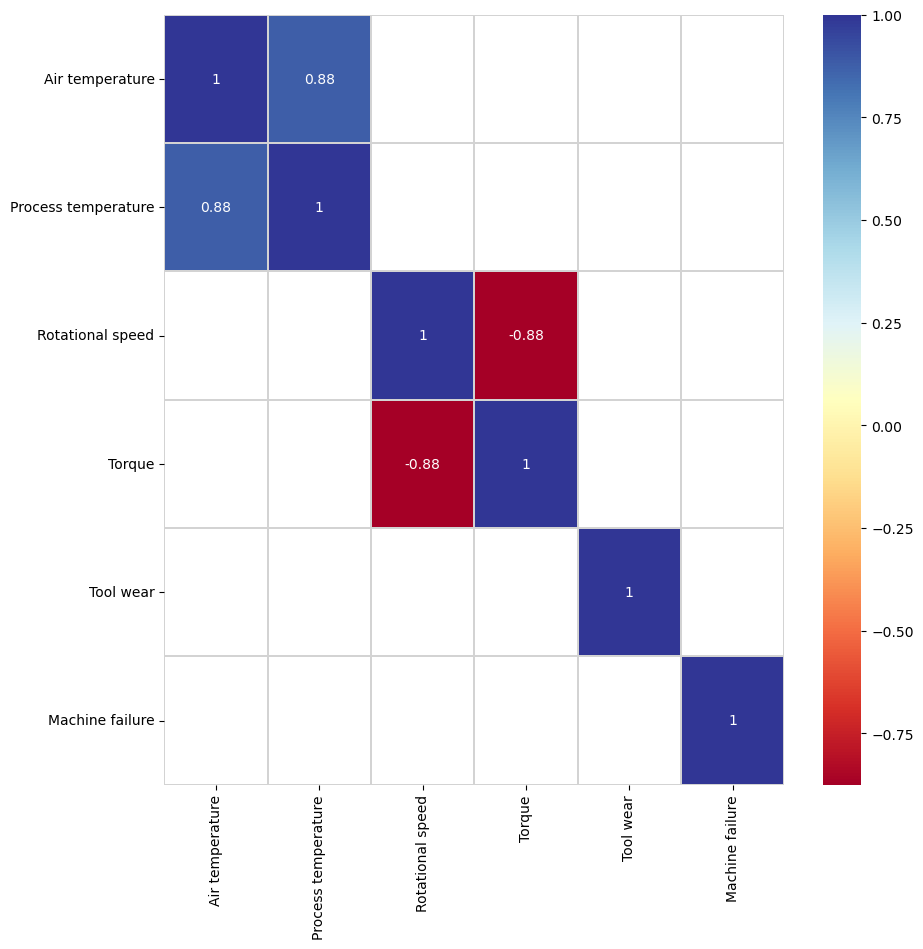

In [14]:
#correlation checking

plt.figure(figsize=(10,10))
threshold = 0.7 # using threashold to filter identify strong correlation 
df_corr = df.select_dtypes(include=[np.number]).corr()
corr_filter = df_corr.where((abs(df_corr)>= threshold)).isna()
sns.heatmap(df_corr,cmap='RdYlBu',mask=corr_filter,annot=True,linewidths=0.2,linecolor='lightgrey')

In [15]:
list(df)

['Type',
 'Air temperature',
 'Process temperature',
 'Rotational speed',
 'Torque',
 'Tool wear',
 'Machine failure']

In [16]:
%%time
profile = ProfileReport(df,
                        title="Predictive Maintenance",
                        dataset={"description": "This profiling report was generated for Kasun Wijethunga",
                                 "copyright_holder": "Kasun Wijethunga",
                                 "copyright_year": "2023",
                                },
                        explorative=True,
                       )
profile

CPU times: user 20.4 ms, sys: 173 µs, total: 20.6 ms
Wall time: 20.4 ms


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
df.columns

Index(['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'Machine failure'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   Air temperature      10000 non-null  float64
 2   Process temperature  10000 non-null  float64
 3   Rotational speed     10000 non-null  float64
 4   Torque               10000 non-null  float64
 5   Tool wear            10000 non-null  float64
 6   Machine failure      10000 non-null  float64
dtypes: float64(6), object(1)
memory usage: 547.0+ KB


In [18]:
failure_count = df.value_counts(['Machine failure'])

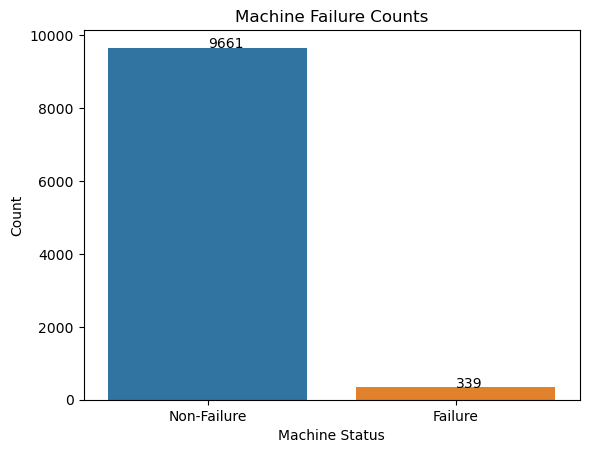

In [19]:
Failure_stautes  = ['Non-Failure', 'Failure']

sns.barplot(x=Failure_stautes, y=failure_count)

# Adding title
plt.title('Machine Failure Counts')

# Adding x and y labels
plt.xlabel('Machine Status')
plt.ylabel('Count')

# Adding annotations
for index, value in enumerate(failure_count):
    plt.text(index, value, str(value))

plt.show()

In [20]:
Type_qty  = df['Type'].value_counts()
print(Type_qty)

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


In [21]:
# creating a new column called Power 
df['Power']=df['Rotational speed']*df['Torque']


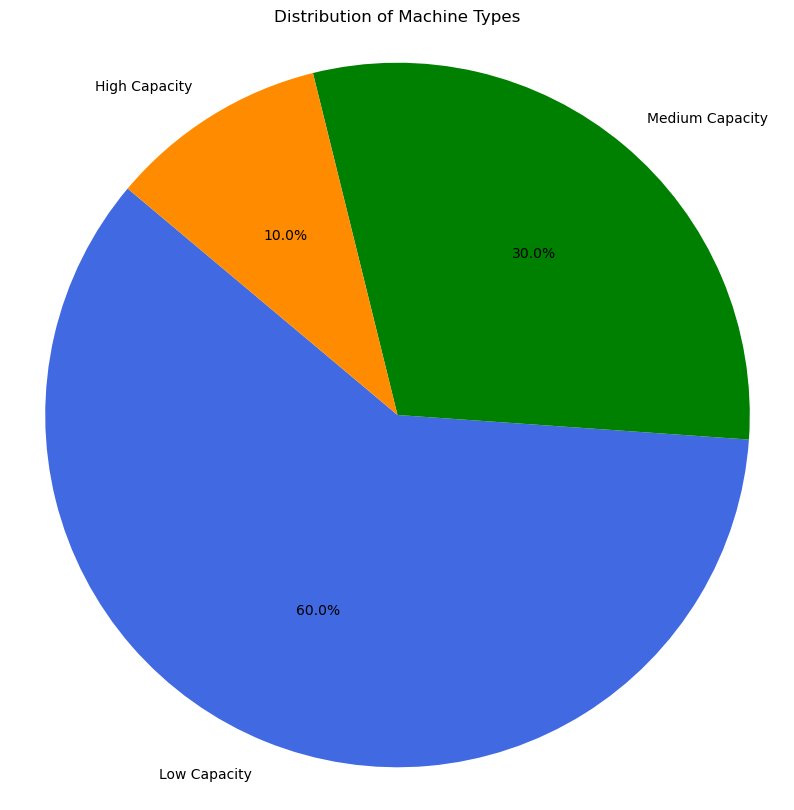

In [28]:
plt.figure(figsize=(10,10))
colors = ['royalblue', 'green', 'darkorange']
labels = 'Low Capacity', 'Medium Capacity', 'High Capacity', 
plt.pie(Type_qty, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Machine Types')
plt.show()

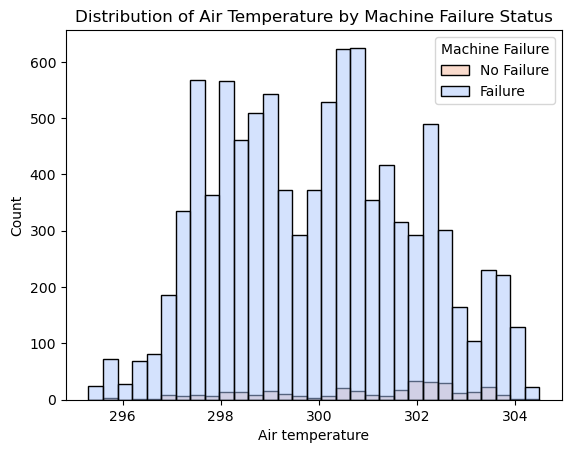

In [41]:
# anaylsis of Air temperature vs Machine failure

sns.histplot(df, x=df['Air temperature'], hue=df['Machine failure'],palette='coolwarm',legend=False)
plt.title('Distribution of Air Temperature by Machine Failure Status')


plt.legend(title='Machine Failure', loc='upper right', labels=['No Failure', 'Failure'])


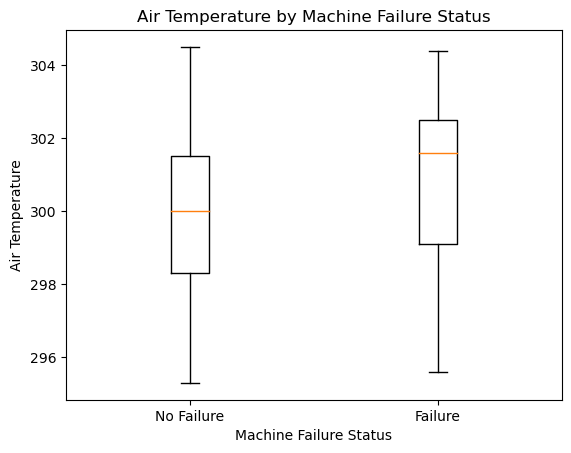

In [45]:
temp_failure = df[df['Machine failure'] == 1]['Air temperature']
temp_no_failure = df[df['Machine failure'] == 0]['Air temperature']

# Create the boxplot
plt.boxplot([temp_no_failure, temp_failure], labels=['No Failure', 'Failure'])
plt.title('Air Temperature by Machine Failure Status')
plt.xlabel('Machine Failure Status')
plt.ylabel('Air Temperature')
plt.show()

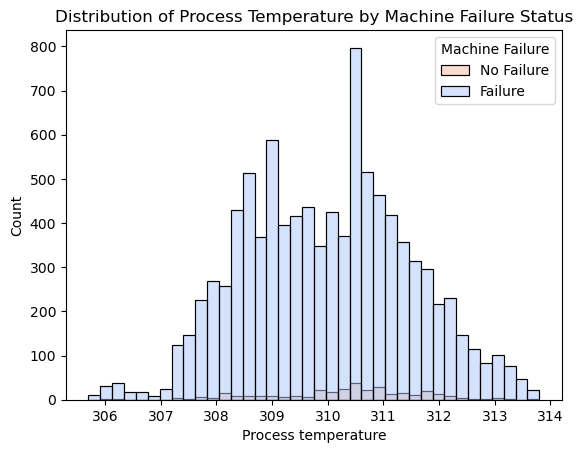

In [46]:
#process temp vs machine failure
sns.histplot(df, x=df['Process temperature'], hue=df['Machine failure'],palette='coolwarm',legend=False)
plt.title('Distribution of Process Temperature by Machine Failure Status')

plt.legend(title='Machine Failure', loc='upper right', labels=['No Failure', 'Failure'])

In [98]:
df.columns

Index(['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'Machine failure'],
      dtype='object')

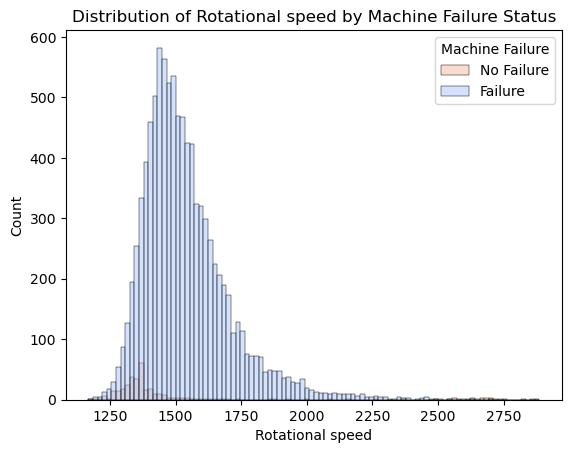

In [47]:
#rotational speed vs machine failure
sns.histplot(df, x=df['Rotational speed'], hue=df['Machine failure'],palette='coolwarm',legend=False)
plt.title('Distribution of Rotational speed by Machine Failure Status')

plt.legend(title='Machine Failure', loc='upper right', labels=['No Failure', 'Failure'])

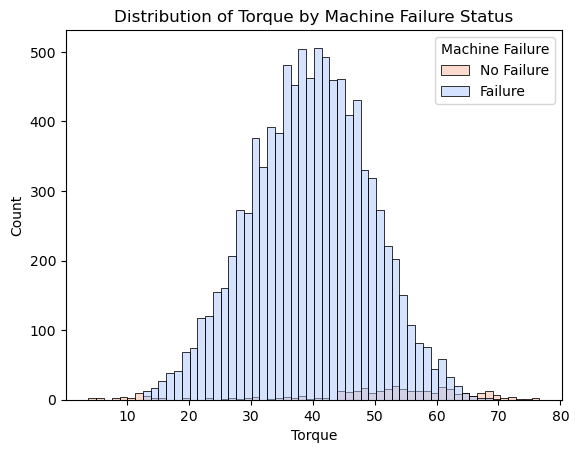

In [48]:
#Torque vs machine failure
sns.histplot(df, x=df['Torque'], hue=df['Machine failure'],palette='coolwarm',legend=False)
plt.title('Distribution of Torque by Machine Failure Status')

plt.legend(title='Machine Failure', loc='upper right', labels=['No Failure', 'Failure'])

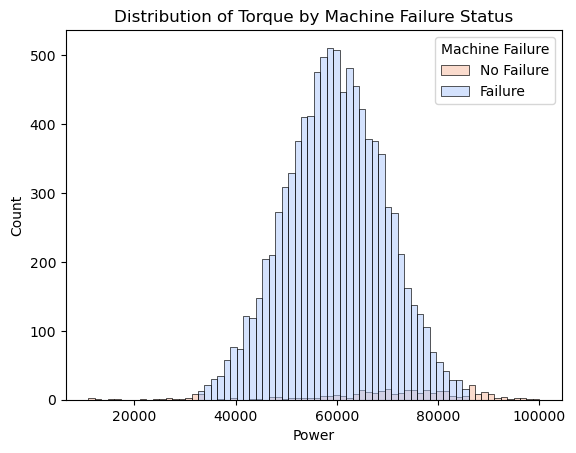

In [49]:
#Power vs machine failure
sns.histplot(df, x=df['Power'], hue=df['Machine failure'],palette='coolwarm',legend=False)
plt.title('Distribution of Torque by Machine Failure Status')

plt.legend(title='Machine Failure', loc='upper right', labels=['No Failure', 'Failure'])

### Preprocessing and Feature Selection  ###

In [58]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Type,10000,3,L,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature,10000.0,NaN,NaN,NaN,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature,10000.0,NaN,NaN,NaN,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed,10000.0,NaN,NaN,NaN,1538.7761,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque,10000.0,NaN,NaN,NaN,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear,10000.0,NaN,NaN,NaN,107.951,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,NaN,NaN,NaN,0.0339,0.180981,0.0,0.0,0.0,0.0,1.0
Power,10000.0,NaN,NaN,NaN,59967.14704,10193.093881,10966.8,53105.4,59883.9,66873.75,99980.4


In [59]:
#dropping Type column 
df.drop(['Type'],axis=1,inplace=True)

In [60]:
df.columns

Index(['Air temperature', 'Process temperature', 'Rotational speed', 'Torque',
       'Tool wear', 'Machine failure', 'Power'],
      dtype='object')

In [61]:
#re-order the column
df = df[['Air temperature', 'Process temperature', 'Rotational speed', 'Torque',
       'Tool wear','Power' ,'Machine failure']]


df.head()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Power,Machine failure
0,298.1,308.6,1551.0,42.8,0.0,66382.8,0.0
1,298.2,308.7,1408.0,46.3,3.0,65190.4,0.0
2,298.1,308.5,1498.0,49.4,5.0,74001.2,0.0
3,298.2,308.6,1433.0,39.5,7.0,56603.5,0.0
4,298.2,308.7,1408.0,40.0,9.0,56320.0,0.0


In [62]:
# X, y seperation

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

### Modeling and Evaluating  ##

In [63]:
from imblearn.over_sampling import SMOTE, SVMSMOTE,RandomOverSampler
oversamp = RandomOverSampler(random_state=0)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify=y)

In [78]:
import time

In [69]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,roc_auc_score, ConfusionMatrixDisplay,matthews_corrcoef
from sklearn.metrics import ConfusionMatrixDisplay  

In [79]:
#model check list

model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','MCC score','time to train','time to predict','total time'])

In [80]:
%%time
from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()


CPU times: user 61 ms, sys: 121 ms, total: 182 ms
Wall time: 31.8 ms


In [81]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 96.70%
Recall: 96.70%
Precision: 96.81%
F1-Score: 95.17%
MCC: 16.86%
ROC AUC score: 87.70%
time to train: 0.03 s
time to predict: 0.00 s
total: 0.03 s


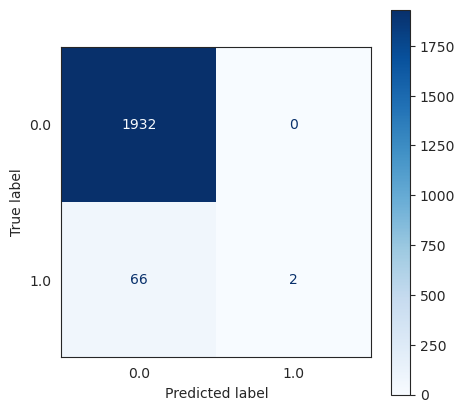

In [82]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### Decision Tree ###

In [83]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 31.4 ms, sys: 3.64 ms, total: 35.1 ms
Wall time: 100 ms


In [84]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 98.05%
Recall: 98.05%
Precision: 98.15%
F1-Score: 98.10%
MCC: 71.81%
ROC AUC score: 87.64%
time to train: 0.10 s
time to predict: 0.00 s
total: 0.10 s


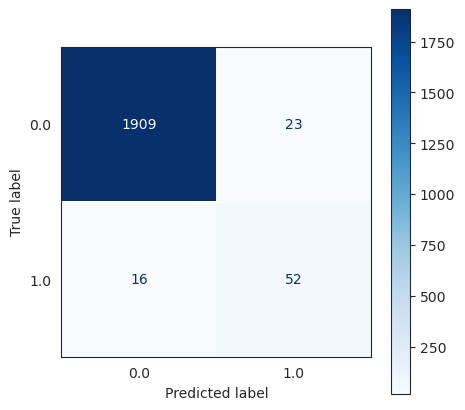

In [86]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()


### Random Forest ###

In [88]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 1.48 s, sys: 52.6 ms, total: 1.54 s
Wall time: 455 ms


In [89]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 98.55%
Recall: 98.55%
Precision: 98.46%
F1-Score: 98.45%
MCC: 75.72%
ROC AUC score: 96.26%
time to train: 0.35 s
time to predict: 0.10 s
total: 0.45 s


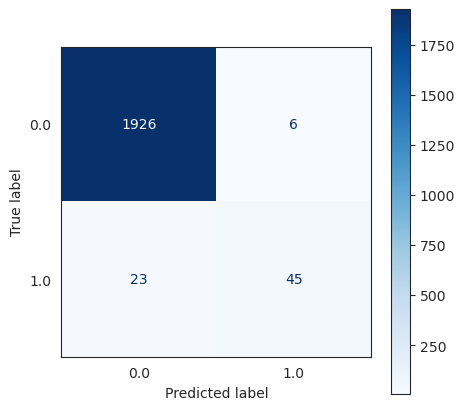

In [90]:


plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()



### Gradient Boosting Classifier ###
 

In [91]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
model = GradientBoostingClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()


CPU times: user 1.14 s, sys: 3.44 ms, total: 1.14 s
Wall time: 1.2 s


In [92]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Gradient Boosting Classifier'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 98.80%
Recall: 98.80%
Precision: 98.77%
F1-Score: 98.70%
MCC: 79.98%
ROC AUC score: 97.20%
time to train: 1.20 s
time to predict: 0.00 s
total: 1.20 s


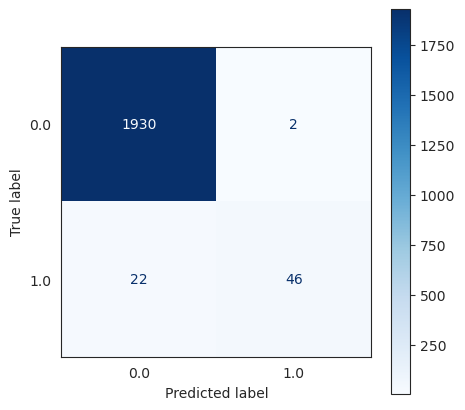

In [93]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### Nuaral Network MLP ###

In [94]:
%%time
from sklearn.neural_network import MLPClassifier
start = time.time()
model = MLPClassifier(hidden_layer_sizes = (100,100,), 
                      activation='relu', 
                      solver='adam',
                      batch_size=2000,
                      verbose=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 37.4 s, sys: 57.7 s, total: 1min 35s
Wall time: 13.2 s


In [95]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Neural Network MLP'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 97.40%
Recall: 97.40%
Precision: 96.99%
F1-Score: 96.94%
MCC: 50.38%
ROC AUC score: 95.71%
time to train: 13.16 s
time to predict: 0.00 s
total: 13.16 s


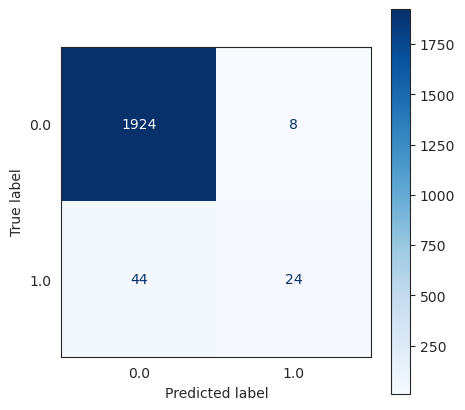

In [96]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()